In [121]:
import sys

from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

In [122]:
%cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/workspaces/IA/Clustering


/home/codespace/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Segmentación de clientes 👩🤠🧑

El siguiente conjunto de datos consiste en información sobre el comportamiento de compra de 2,000 individuos de una determinada área al entrar en una tienda física de bienes de consumo rápido. Todos los datos se han recopilado a través de las tarjetas que utilizan al momento de pagar. Los datos han sido preprocesados y no hay valores faltantes. Además, el volumen del conjunto de datos se ha limitado y anonimizado para proteger la privacidad de los clientes.

Columnas del conjunto de datos:

- **Sex**: género.
        0: masculino,
        1: femenino.
- **Marital status**: Estado civil de un cliente.
        0: soltero,
        1: no soltero (divorciado/separado/casado/viudo).
- **Age**: Edad del cliente en años. Valor mínimo: 18, Valor máximo: 78.
- **Education**: Nivel educativo del cliente.
        0: otro/desconocido,
        1: escuela secundaria,
        2: universidad,
        3: posgrado.
- **Income**: Ingreso anual autoreportado en dólares estadounidenses del cliente. Valor mínimo: 35,832, Valor máximo: 309,364.
- **Occupation**: Categoría de la ocupación del cliente.
        0: desempleado/no calificado,
        1: empleado calificado/funcionario,
        2: administración/autónomo/empleado altamente calificado/oficial.
- **Settlement size**: Tamaño de la ciudad donde vive el cliente.
        0: ciudad pequeña,
        1: ciudad mediana,
        2: gran ciudad.

A continuación, Aplique el algoritmo de K-means para realizar una **segmentación de clientes** (**customer segmentation**), esta es una estrategia y técnica en marketing y análisis de datos que implica dividir una base de clientes en grupos más pequeños y homogéneos según características y comportamientos similares. El objetivo principal de la segmentación de clientes es comprender mejor a los diferentes grupos de clientes para poder adaptar estrategias y enfoques de marketing específicos a cada segmento.

In [124]:
customer = pd.read_csv('1_datos/customer_data.csv')
customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


> Cuando estamos aplicando kmeans a datos del mundo real usando la métrica de distancia euclídea, queremos asegurarnos que las características se miden en la misma escala por lo que es necesario escalar los datos. Utilice el escalado _MinMax_

In [125]:
from sklearn.preprocessing import MinMaxScaler

X = customer[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]

scaler = MinMaxScaler()
X_escalado = scaler.fit_transform(X)

In [126]:
kmeans_per_k = [ KMeans(n_clusters=k, n_init=10, random_state=1).fit(X_escalado) for k in range(1, 10) ]
inertias = [ model.inertia_ for model in kmeans_per_k ]

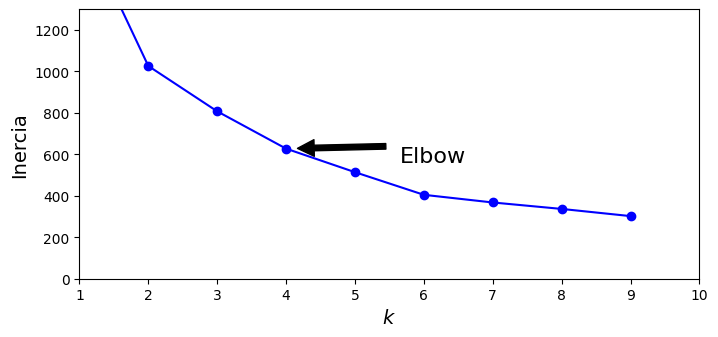

In [127]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1) )
plt.axis([1, 10, 0, 1300])
plt.show()

In [128]:
kmeans = KMeans(n_clusters=4 , n_init=10, random_state=1)
kmeans.fit(X_escalado)
kmeans.inertia_

627.4824486201511

Grafique el valor de silueta en función de _k_ y el Diagrama de Silueta para obtener un valor óptimo de _k_.

In [129]:
silhouette_scores = [silhouette_score(X_escalado, model.labels_) for model in kmeans_per_k[1:]] #por lo menos 2 clusters

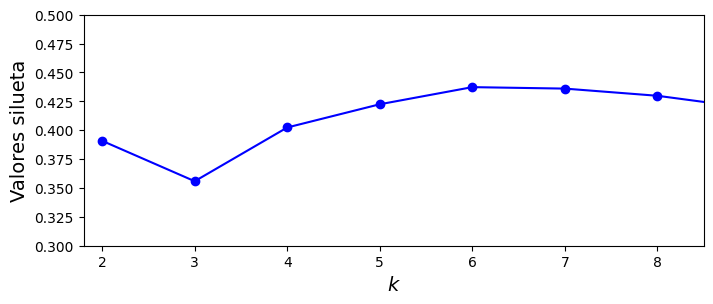

In [130]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Valores silueta", fontsize=14)
plt.axis([1.8, 8.5, 0.30, 0.5])
plt.show()

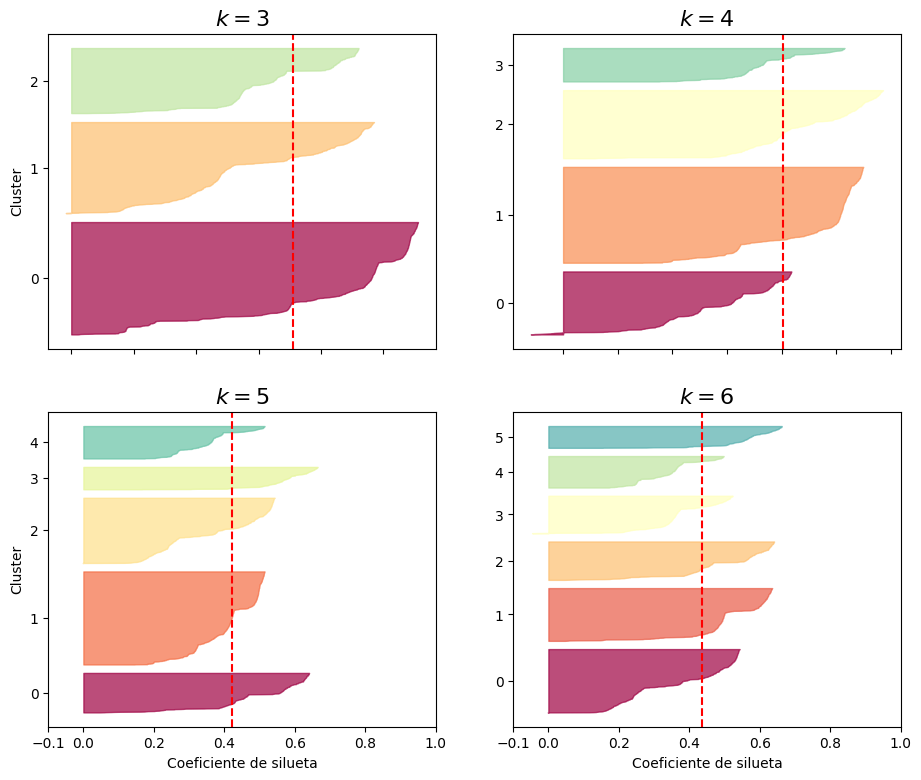

In [131]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_ #etiquetas de cada instancia de X
    silhouette_coefficients = silhouette_samples(X_escalado, y_pred) #coeficientes para cada una de las instancias en X

    padding = len(X_escalado) // 30

    pos = padding
    ticks = []
    #Grafico los coeficientes de silueta por cada cluster
    for i in range(k): #i = 0,1,2..
        coeffs = silhouette_coefficients[y_pred == i] #coeficientes correspondientes a un cluster específico
        coeffs.sort()

        color = mpl.cm.Spectral(i / k) #colormap
        plt.fill_betweenx(y = np.arange(pos, pos + len(coeffs)), x1=0, x2=coeffs, facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Coeficiente de silueta")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Una vez agrupadas las instancias en _k_ clusters, cree un nuevo dataframe agregando como columna adicional, las etiquetas otorgadas por el modelo de _k-means_.
Ahora se podrían filtrar los datos de cada cluster para analizar las características específicas de cada grupo. Sin embargo, se puede utilizar un modelo adicional para ayudar con esta tarea.

Utilice un *árbol de decisión* como una representación visual para la toma de decisiones basadas en las características de los clientes y asignarlos a diferentes segmentos o agrupamientos (*clusters*). Utilice el coeficiente de gini, limite la profundidad del árbol a 4 y establezca un número mínimo de 5 instancias en un nodo hoja.

Clasifique los clientes y escriba las características de los clientes encontradas en cada cluster.

In [132]:
kmeans = KMeans(n_clusters= 4, n_init=10, random_state=1)
customer['cluster_label'] = kmeans.fit_predict(customer)

X = customer.drop('cluster_label', axis=1)
y = customer['cluster_label']
customer.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0


In [133]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5)
decision_tree.fit(X_escalado, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [134]:
predicted_clusters = decision_tree.predict(X_escalado)
for cluster_num in range(k):
    cluster_data = customer[customer['cluster_label'] == cluster_num]
    print(f"Caracterirticas Cluster {cluster_num} :")
    print(cluster_data.describe())

Caracterirticas Cluster 0 :
                 ID         Sex  Marital status         Age   Education  \
count  4.570000e+02  457.000000      457.000000  457.000000  457.000000   
mean   1.000008e+08    0.301969        0.435449   40.927790    1.192560   
std    4.339827e+02    0.459615        0.496359   12.400005    0.677092   
min    1.000000e+08    0.000000        0.000000   20.000000    0.000000   
25%    1.000004e+08    0.000000        0.000000   31.000000    1.000000   
50%    1.000008e+08    0.000000        0.000000   38.000000    1.000000   
75%    1.000011e+08    1.000000        1.000000   50.000000    2.000000   
max    1.000016e+08    1.000000        1.000000   76.000000    3.000000   

              Income  Occupation  Settlement size  cluster_label  
count     457.000000  457.000000       457.000000          457.0  
mean   154150.634573    1.249453         1.238512            0.0  
std     13990.010483    0.568860         0.693014            0.0  
min    134433.000000    0.00

In [135]:
print(predicted_clusters)

[1 0 3 ... 3 1 3]


Para clasificar los clientes, nos fijamos en la característica evaluada en cada nodo. Si se cumple lo que se está evaluando, descendemos al nodo izquierdo, de lo contrario descendemos al nodo derecho, así hasta alcanzar un nodo hoja .

- Cluster 1 -->
- Cluster 2 -->

...
